### 5장 우리나라 인구 소멸 위기 지역 분석

> 인구 소멸 위기 지역:<br>
‘한국의 ‘지방소멸’에 관한 7가지 분석’ 보고서를 쓴 이상호 한국고용정보원 부연구위원의 분석 방법을 이용. 65세 이상 노인 인구와 20∼39세 여성 인구를 비교해 **젊은 여성 인구가 노인 인구의 절반에 미달할 경우 ‘소멸 위험 지역’으로 분류**하는 방식이다.

#### 5-2. 인구 데이터 확보하고 정리하기


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [9]:
population = pd.read_excel('./data/05._population_raw_data.xlsx', header=1)
population.fillna(method='pad', inplace=True)

population.rename(columns = {'행정구역(동읍면)별(1)':'광역시도', 
                             '행정구역(동읍면)별(2)':'시도', 
                             '계':'인구수'}, inplace=True)

population = population[(population['시도'] != '소계')]

population.tail()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
832,제주특별자치도,제주시,남자인구수 (명),246383,15942,16532,14159,16672,11807,7916,6000,3904,1774,424,52,6
833,제주특별자치도,제주시,여자인구수 (명),246536,14051,15179,13656,16630,12453,9023,7653,6427,4411,1912,580,129
834,제주특별자치도,서귀포시,총인구수 (명),184224,9194,9305,8531,10901,11318,8538,6931,5574,3355,1115,261,76
835,제주특별자치도,서귀포시,남자인구수 (명),92865,4953,5025,4297,5392,5523,4086,3092,2083,985,198,32,3
836,제주특별자치도,서귀포시,여자인구수 (명),91359,4241,4280,4234,5509,5795,4452,3839,3491,2370,917,229,73


- 위 표를 보면 항목이라는 컬럼의 내용이 각 행정구역 마다 총인구수, 남자인구수, 여자인구수로 나눠있는 것을 알 수 있음
- 이를 지금 정리하기 위해 간단히 반복문(for)으로 합계, 남자, 여자로 변경하고 구분이라는 컬럼으로 저장함
- 특히 이후 데이터 처리에서 copy 관련 warning을 피하기 위해 .copy()옵션으로 재지정함
- 그리고, **항목**을 지우기로 함

In [11]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
                        population['30 - 34세'] + population['35 - 39세']
    
population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
                        population['75 - 79세'] + population['80 - 84세'] + \
                        population['85 - 89세'] + population['90 - 94세'] + \
                        population['95 - 99세'] + population['100+']
            
population.tail()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
832,제주특별자치도,제주시,남자,246383,15942,16532,14159,16672,11807,7916,6000,3904,1774,424,52,6,63305,31883
833,제주특별자치도,제주시,여자,246536,14051,15179,13656,16630,12453,9023,7653,6427,4411,1912,580,129,59516,42588
834,제주특별자치도,서귀포시,합계,184224,9194,9305,8531,10901,11318,8538,6931,5574,3355,1115,261,76,37931,37168
835,제주특별자치도,서귀포시,남자,92865,4953,5025,4297,5392,5523,4086,3092,2083,985,198,32,3,19667,16002
836,제주특별자치도,서귀포시,여자,91359,4241,4280,4234,5509,5795,4452,3839,3491,2370,917,229,73,18264,21166


#### 5-3. 인구 소멸 위기 지역 계산하고 데이터 정리하기


In [12]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
                        population['30 - 34세'] + population['35 - 39세']
    
population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
                        population['75 - 79세'] + population['80 - 84세'] + \
                        population['85 - 89세'] + population['90 - 94세'] + \
                        population['95 - 99세'] + population['100+']
            
population.tail()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
832,제주특별자치도,제주시,남자,246383,15942,16532,14159,16672,11807,7916,6000,3904,1774,424,52,6,63305,31883
833,제주특별자치도,제주시,여자,246536,14051,15179,13656,16630,12453,9023,7653,6427,4411,1912,580,129,59516,42588
834,제주특별자치도,서귀포시,합계,184224,9194,9305,8531,10901,11318,8538,6931,5574,3355,1115,261,76,37931,37168
835,제주특별자치도,서귀포시,남자,92865,4953,5025,4297,5392,5523,4086,3092,2083,985,198,32,3,19667,16002
836,제주특별자치도,서귀포시,여자,91359,4241,4280,4234,5509,5795,4452,3839,3491,2370,917,229,73,18264,21166


- **pivot_table**을 이용하여 광역시도, 시도를 index로 두고, 구분으로 세로를 첫 번째 컬럼을 잡고, value에 **인구수, 20~39세, 65세이상**으로 정리해 둔다.


In [13]:
pop = pd.pivot_table(population, 
                     index = ['광역시도', '시도'], 
                     columns = ['구분'],
                     values = ['인구수', '20-39세', '65세이상'])
pop.tail()

20-39세                  65세이상                    인구수                
구분            남자      여자      합계     남자     여자      합계      남자      여자      합계
광역시도 시도                                                                       
충청북도 진천군   11645    8980   20625   6416   8227   14643   44946   40611   85557
     청원구   30923   25104   56027  11359  15145   26504   99814   94283  194097
     청주시  126512  108738  235250  52788  68725  121513  428231  420798  849029
     충주시   25785   20139   45924  19174  25096   44270  105853  103306  209159
     흥덕구   43596   37656   81252  14055  17853   31908  135779  131564  267343

- **소멸비율**이라는 컬럼에 인구소멸위기지역을 계산하기 위한 식을 적용한다
- 이 비율이 1보다 작으면 **인구소멸위기지역**으로 볼 수 있다.

In [14]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)
pop.head()

20-39세                65세이상                   인구수                  \
구분           남자     여자     합계     남자     여자     합계      남자      여자      합계   
광역시도 시도                                                                      
강원도  강릉시  24539  20913  45452  20485  27304  47789  105554  107213  212767   
     고성군   3070   1996   5066   3548   4762   8310   14091   13235   27326   
     동해시  10090   7775  17865   8438  10803  19241   45713   44237   89950   
     삼척시   6588   5354  11942   7248   9785  17033   32214   31516   63730   
     속초시   9916   8031  17947   7253   9625  16878   41074   41716   82790   

              소멸비율  
구분                  
광역시도 시도             
강원도  강릉시  0.875222  
     고성군  0.480385  
     동해시  0.808170  
     삼척시  0.628662  
     속초시  0.951653

- 소멸위기지역인지를 boolean으로 지정해 둔다

In [16]:
pop['소멸위기지역'] = pop['소멸비율'] < 1
pop.tail()

20-39세                  65세이상                    인구수          \
구분            남자      여자      합계     남자     여자      합계      남자      여자   
광역시도 시도                                                                  
충청북도 진천군   11645    8980   20625   6416   8227   14643   44946   40611   
     청원구   30923   25104   56027  11359  15145   26504   99814   94283   
     청주시  126512  108738  235250  52788  68725  121513  428231  420798   
     충주시   25785   20139   45924  19174  25096   44270  105853  103306   
     흥덕구   43596   37656   81252  14055  17853   31908  135779  131564   

                      소멸비율 소멸위기지역  
구분            합계                   
광역시도 시도                            
충청북도 진천군   85557  1.226525  False  
     청원구  194097  1.894356  False  
     청주시  849029  1.789734  False  
     충주시  209159  0.909826   True  
     흥덕구  267343  2.360286  False

In [17]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '인제군', '정선군',
       ...
       '태안군', '홍성군', '괴산군', '단양군', '보은군', '영동군', '옥천군', '음성군', '제천시', '충주시'],
      dtype='object', name='시도', length=115)

- pivot_table로 잘 정리가 된 상태에서 **.reset_index**로 pivot_table의 result 속성을 다시 설정한다.

In [18]:
pop.reset_index(inplace=True) 
pop.head()

광역시도   시도 20-39세                65세이상                   인구수          \
구분               남자     여자     합계     남자     여자     합계      남자      여자   
0   강원도  강릉시  24539  20913  45452  20485  27304  47789  105554  107213   
1   강원도  고성군   3070   1996   5066   3548   4762   8310   14091   13235   
2   강원도  동해시  10090   7775  17865   8438  10803  19241   45713   44237   
3   강원도  삼척시   6588   5354  11942   7248   9785  17033   32214   31516   
4   강원도  속초시   9916   8031  17947   7253   9625  16878   41074   41716   

                소멸비율 소멸위기지역  
구분      합계                   
0   212767  0.875222   True  
1    27326  0.480385   True  
2    89950  0.808170   True  
3    63730  0.628662   True  
4    82790  0.951653   True

- 이중 column을 해제하기 위해 두 컬럼 제목을 합쳐 다시 지정한다.

In [19]:
tmp_coloumns = [pop.columns.get_level_values(0)[n] + \
                pop.columns.get_level_values(1)[n] 
                for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_coloumns

pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,24539,20913,45452,20485,27304,47789,105554,107213,212767,0.875222,True
1,강원도,고성군,3070,1996,5066,3548,4762,8310,14091,13235,27326,0.480385,True
2,강원도,동해시,10090,7775,17865,8438,10803,19241,45713,44237,89950,0.808170,True
3,강원도,삼척시,6588,5354,11942,7248,9785,17033,32214,31516,63730,0.628662,True
4,강원도,속초시,9916,8031,17947,7253,9625,16878,41074,41716,82790,0.951653,True


#### 5-5. 지도 시각화를 위해 지역별 고유 ID 만들기

In [20]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시', '안양시',
       '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '용인시', '의왕시', '의정부시',
       '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구', '파주시', '팔달구', '평택시',
       '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '남해군', '마산합포구', '마산회원구',
       '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군', '의창구', '진주시', '진해구',
       '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시',
       '고령군', '구미시', '군위군', '김천시', '남구', '문경시', '봉화군', '북구', '상주시', '성주군',
       '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군',
       '청도군', '청송군', '칠곡군', '포항시', '광산구', '동구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
 

In [21]:
si_name = [0] * len(pop)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [22]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [23]:
si_name[:10]

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제']

In [28]:
pop['ID'] = si_name
pop.drop(['20-39세남자', '65세이상남자', '65세이상여자'], axis=1, inplace=True)
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,20913,45452,47789,105554,107213,212767,0.875222,True,강릉
1,강원도,고성군,1996,5066,8310,14091,13235,27326,0.480385,True,고성(강원)
2,강원도,동해시,7775,17865,19241,45713,44237,89950,0.808170,True,동해
3,강원도,삼척시,5354,11942,17033,32214,31516,63730,0.628662,True,삼척
4,강원도,속초시,8031,17947,16878,41074,41716,82790,0.951653,True,속초


In [32]:
draw_korea_raw = pd.read_excel('./data/05._draw_korea_raw.xlsx')
draw_korea_raw.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
22,목포,나주,광주 서구,광주 북구,순천,고흥,남해,고성(경남),거제,NaN,NaN,NaN,NaN,NaN
23,해남,영암,광주 남구,광주 동구,여수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,진도,강진,장흥,보성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,완도,NaN,NaN,제주,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,서귀포,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea_raw_stacked.tail()

,y,x,ID
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주
249,26,5,서귀포


In [34]:
draw_korea = draw_korea_raw_stacked

In [35]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

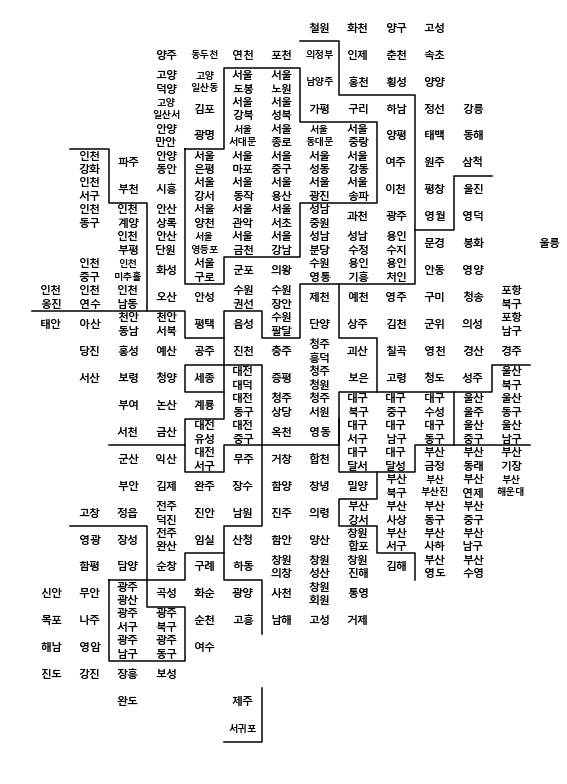

In [38]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

- 인구에 대한 분석 결과인 pop과 지도를 그리기 위한 draw_korea의 대이터를 합칠 때 사용할 key인 ID 컬럼의 내용이 문제가 없는지 확인하자

In [39]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set()

In [40]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

- 위 결과에 따르면, pop에 행정구를 가진 시들의 데이터가 더 있다는 것을 알 수 있다.
- 어차피 지도에서는 표시되지 못하니 삭제한다.

In [41]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


- 이제 pop과 draw_korea의 ID 컬럼이 일치했다고 보고, ID를 key로 merge를 시키도록 한다.


In [42]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

In [43]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

mapdata.tail()

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
22,218605.0,116749.0,290550.0,427139.0,280607.0,62606.0,42235.0,50224.0,240059.0,NaN,NaN,NaN,NaN,NaN
23,67071.0,52946.0,215454.0,103299.0,276544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,29969.0,33620.0,36405.0,39251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,48415.0,NaN,NaN,492919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,184224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

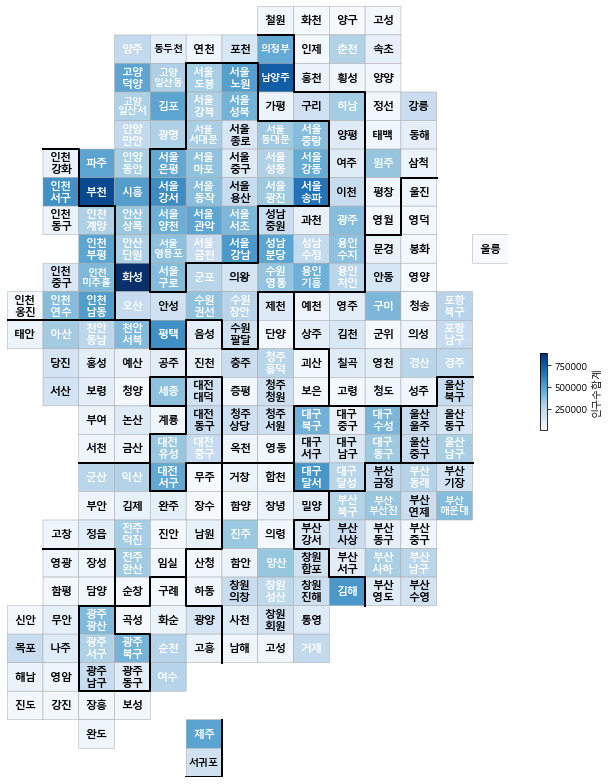

In [45]:
drawKorea('인구수합계', pop, 'Blues')

- 인구 소멸 위기 지역에 대한 표현


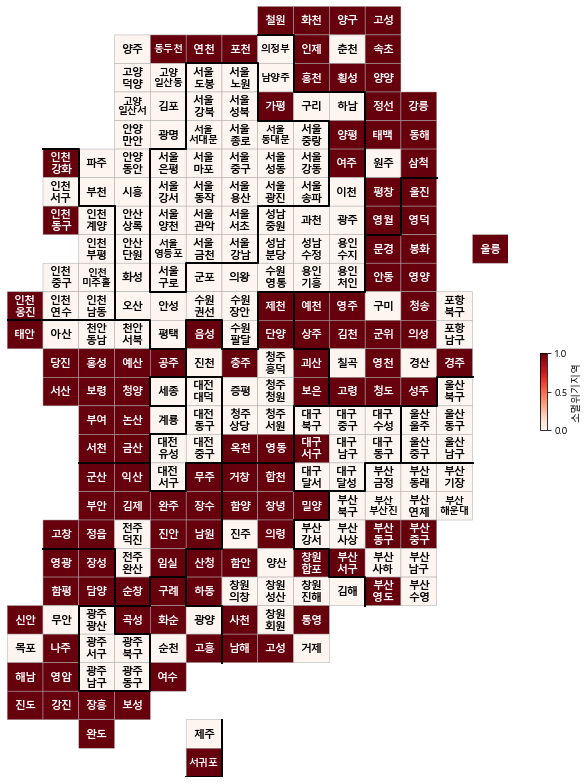

In [46]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

#### 5-8. 인구 현황에서 여성 인구 비율 확인하기


In [49]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show();

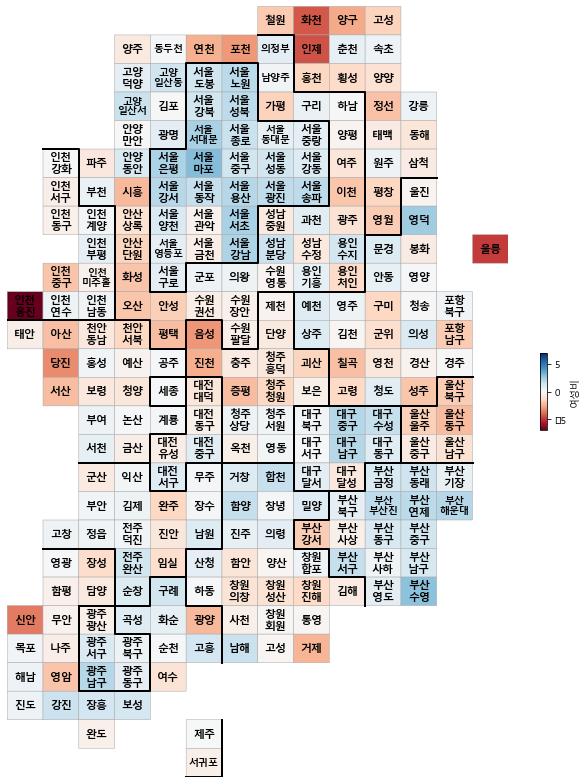

In [50]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

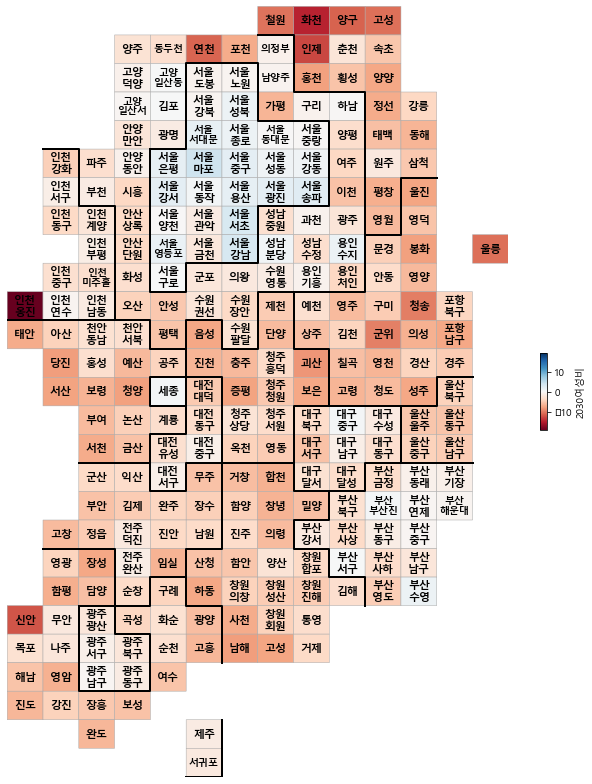

In [51]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

#### 5-9. Folium에서 인구 소멸 위기 지역 표현하기


In [52]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,20913,45452,47789,105554,107213,212767,0.875222,1,3,11,0.389863,-3.988823
고성(강원),강원도,고성군,1996,5066,8310,14091,13235,27326,0.480385,1,0,10,-1.566274,-10.600079
동해,강원도,동해시,7775,17865,19241,45713,44237,89950,0.808170,1,4,11,-0.820456,-6.479149
삼척,강원도,삼척시,5354,11942,17033,32214,31516,63730,0.628662,1,5,11,-0.547623,-5.166639
속초,강원도,속초시,8031,17947,16878,41074,41716,82790,0.951653,1,1,10,0.387728,-5.251574


In [53]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
geo_path = './data/05._skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

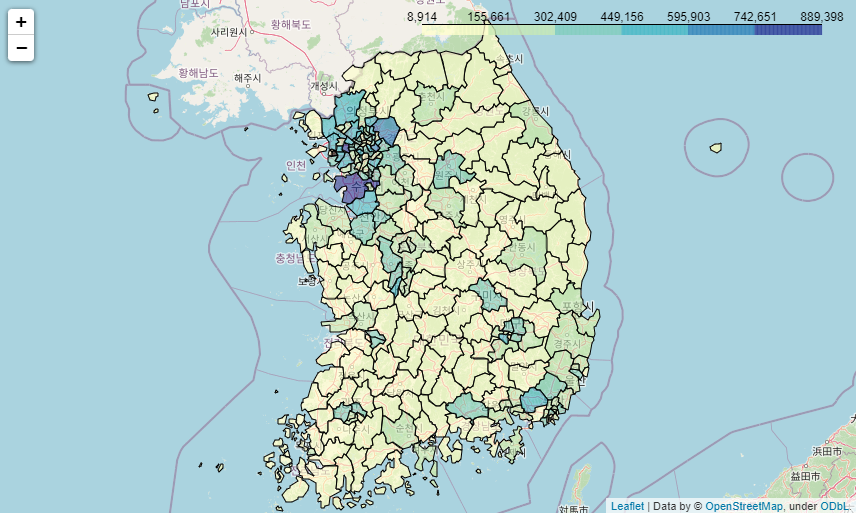

In [55]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map

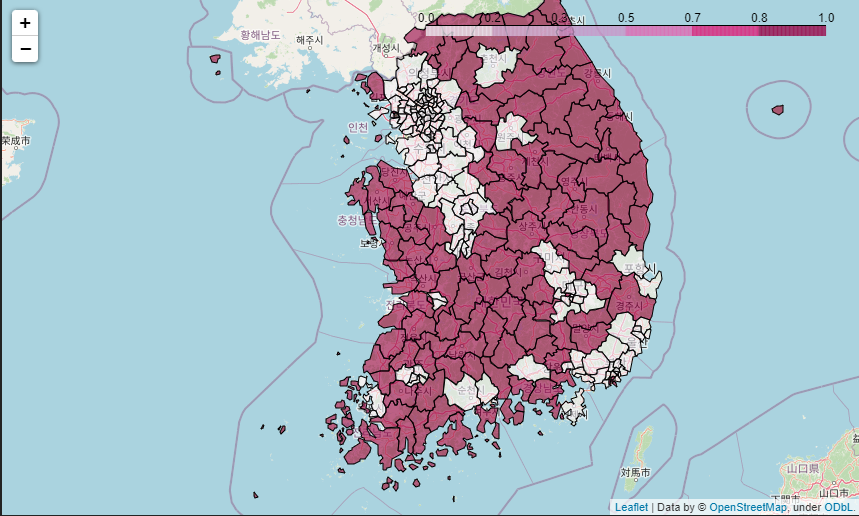